# PART - A (Preparation)

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

## Load data

In [2]:
# Load the datasets
fear = pd.read_csv("_data/fear_greed_index.csv")
trades = pd.read_csv("_data/historical_data.csv")

## Inspect datasets

In [3]:
# Check fear dataset
fear.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
# check info about fear df
fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [5]:
# Check trades dataset
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000


In [6]:
# check info about trades df
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
# Check nulls & duplicates
print("Fear-Greed shape:", fear.shape)
print("Trades shape:", trades.shape)

print("\nMissing values in Fear dataset:")
print(fear.isnull().sum())

print("\nMissing values in Trades dataset:")
print(trades.isnull().sum())

print("\nDuplicate rows:")
print("Fear duplicates:", fear.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())

Fear-Greed shape: (2644, 4)
Trades shape: (211224, 16)

Missing values in Fear dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trades dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate rows:
Fear duplicates: 0
Trades duplicates: 0


### Detecting Outliers with `boxplot` and `IQR` method

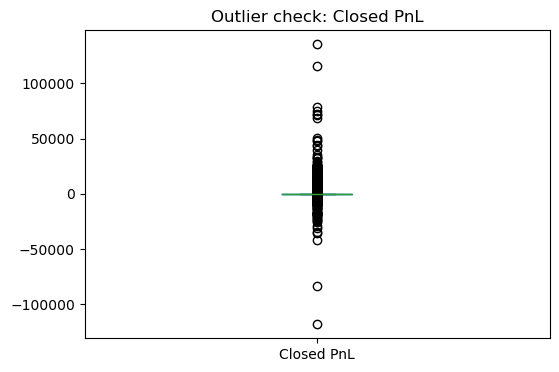

In [8]:
# Using box plot for visualizing outliers in 'Closed PnL'
plt.figure(figsize=(6,4))
trades['Closed PnL'].plot(kind='box')
plt.title("Outlier check: Closed PnL")
plt.savefig("EDA_Images/Closed_PnL_Outlier.png") #saving image
plt.show()

In [9]:
# IQR method
Q1 = trades['Closed PnL'].quantile(0.25)
Q3 = trades['Closed PnL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_1 = Q1 - 1.5 * IQR
upper_bound_1 = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound_1)
print("Upper bound:", upper_bound_1)

Lower bound: -8.689195125
Upper bound: 14.481991874999999


In [10]:
# Info about outliers in PnL
outliers = trades[
    (trades['Closed PnL'] < lower_bound_1) |
    (trades['Closed PnL'] > upper_bound_1)
]

print("Number of PnL outliers:", len(outliers))
print("Percentage outliers:", round(100 * len(outliers) / len(trades), 2), "%")

Number of PnL outliers: 48941
Percentage outliers: 23.17 %


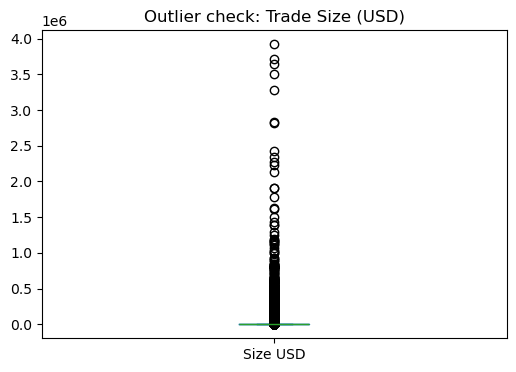

In [11]:
# Using box plot for visualizing outliers in 'Size USD'
plt.figure(figsize=(6,4))
trades['Size USD'].plot(kind='box')
plt.title("Outlier check: Trade Size (USD)")
plt.savefig("EDA_Images/Trade_Size_Outlier.png") #saving image
plt.show()

In [12]:
# IQR method
Q1 = trades['Size USD'].quantile(0.25)
Q3 = trades['Size USD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_2 = Q1 - 1.5 * IQR
upper_bound_2 = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound_2)
print("Upper bound:", upper_bound_2)

Lower bound: -2603.965
Upper bound: 4856.715


In [13]:
# Info about outliers in 'Size USD'
outliers = trades[
    (trades['Size USD'] < lower_bound_2) |
    (trades['Size USD'] > upper_bound_2)
]

print("Number of PnL outliers:", len(outliers))
print("Percentage outliers:", round(100 * len(outliers) / len(trades), 2), "%")

Number of PnL outliers: 32661
Percentage outliers: 15.46 %


### Handeling Outliers with `Winsorization` method

In [14]:
# Capping PnL outliers
trades['Closed_PnL_capped'] = trades['Closed PnL'].clip(
    lower=lower_bound_1,
    upper=upper_bound_1
)

In [15]:
# Capping trade size (USD) outliers
trades['Size_USD_capped'] = trades['Size USD'].clip(
    lower=lower_bound_2,
    upper=upper_bound_2
)

## Transforming data

### Convert fear timestamp to date 

In [16]:
# convert unix timestamp to date
fear["date"] = pd.to_datetime(fear["timestamp"], unit= 's').dt.date

# convert existing date's datatype into date
fear["date2"] = pd.to_datetime(fear['date'], dayfirst=True).dt.date

# keep only one final date column
fear = fear[["date", "classification"]]

In [17]:
# check fear df
fear.head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


### Convert Trade timestamps to date

In [18]:
# convert timestamp IST to datetime
trades["date"] = pd.to_datetime(trades["Timestamp IST"], dayfirst = True).dt.date

In [19]:
trades[['Timestamp IST','date']].head()

,Timestamp IST,date
0,02-12-2024 22:50,2024-12-02
1,02-12-2024 22:50,2024-12-02
2,02-12-2024 22:50,2024-12-02
3,02-12-2024 22:50,2024-12-02
4,02-12-2024 22:50,2024-12-02


### Convert Trades Trade ID to object (dtype)

In [20]:
trades['Trade ID'] = trades['Trade ID'].astype(str)

In [21]:
trades['Trade ID'].dtype

dtype('O')

## Creating metrics

### Daily PnL per trader

In [22]:
daily_PnL = (
    trades
    .groupby(['date','Account'])['Closed_PnL_capped']
    .sum()
    .reset_index(name='PnL')
)

In [23]:
daily_PnL[:5]

,date,Account,PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,40.5496
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-17.3784
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000


### Win rate

In [24]:
# creating "win" column
trades["is_win"] = trades["Closed_PnL_capped"] > 0

# calculating win rate
daily_win = (
        trades
        .groupby(["date", "Account"])["is_win"]
        .mean()
        .reset_index(name="daily_win")
)

In [25]:
daily_win[:5]

,date,Account,daily_win
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.3636
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000


### Average Trade size

In [26]:
avg_trade_size = (
            trades
            .groupby(["date"])["Size_USD_capped"]
            .mean()
            .reset_index(name='avg_trade_size')
            .round(2)
)

In [27]:
avg_trade_size[:5]

,date,avg_trade_size
0,2023-05-01,159.0000
1,2023-12-05,2666.3100
2,2023-12-14,4389.2000
3,2023-12-15,4399.4600
4,2023-12-16,4723.1000


### Leverage distribution

In [28]:
trades['leverage_proxy'] = trades['Size_USD_capped'] / (trades['Start Position'].abs() + 1)

daily_leverage = (
        trades
        .groupby('date')['leverage_proxy']
        .mean()
        .reset_index(name='avg_leverage')
)

In [29]:
daily_leverage.head()

,date,avg_leverage
0,2023-05-01,147.4629
1,2023-12-05,1257.6574
2,2023-12-14,1252.9869
3,2023-12-15,2.1722
4,2023-12-16,1560.2405


### Number of trades per day

In [30]:
daily_trades = (
    trades
    .groupby('date')['Trade ID']
    .count()
    .reset_index(name='num_trades')
)

In [31]:
daily_trades[:5]

,date,num_trades
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3


### Long vs Short ratio

In [32]:
daily_side = (
            trades
            .groupby(["date", "Side"])["Trade ID"]
            .count()
            .reset_index(name="count")
)

daily_long_short = daily_side.pivot(
                index='date',
                columns='Side',
                values='count'
        ).fillna(0)

daily_long_short['long_short_ratio'] = (
        daily_long_short.get('BUY',0) /
        (daily_long_short.get('SELL',0) + 1)
)

In [33]:
daily_long_short.head()

Side,BUY,SELL,long_short_ratio
date,,,
2023-05-01,3.0000,0.0000,3.0000
2023-12-05,7.0000,2.0000,2.3333
2023-12-14,5.0000,6.0000,0.7143
2023-12-15,2.0000,0.0000,2.0000
2023-12-16,3.0000,0.0000,3.0000


## Create Master Table

### Merge daily_pnl and daily_win
First, we will merge daily_pnl and daily_win to avoid having two accounts columns in Master table.

In [34]:
traders_daily = (
            daily_PnL
            .merge(daily_win, how='left', on=['date', 'Account'])
)

traders_daily.head()

,date,Account,PnL,daily_win
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0000,0.0000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000,0.0000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,40.5496,0.3636
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-17.3784,0.0000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000,0.0000


### Master Table
We will merge traders_daily with rest of the metrics. 

In [35]:
master = (
        traders_daily
        .merge(fear, how='left', on='date')
        .merge(avg_trade_size, how='left', on='date')
        .merge(daily_leverage, how='left', on='date')
        .merge(daily_trades, how='left', on='date')
        .merge(daily_long_short[["long_short_ratio"]], how='left', on='date')

)

In [36]:
master[:5]

,date,Account,PnL,daily_win,classification,avg_trade_size,avg_leverage,num_trades,long_short_ratio
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.0000,0.0000,Greed,159.0000,147.4629,3,3.0000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000,0.0000,Extreme Greed,2666.3100,1257.6574,9,2.3333
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,40.5496,0.3636,Greed,4389.2000,1252.9869,11,0.7143
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-17.3784,0.0000,Greed,4399.4600,2.1722,2,2.0000
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.0000,0.0000,Greed,4723.1000,1560.2405,3,3.0000


# PART - B (Analysis)

### 1. Does performance differ by sentiment?

In [37]:
# grouping sentiment with daily_PnL
PnL_by_sentiment = (
                master
                .groupby('classification')['PnL']
                .mean()
                .reset_index()
)

In [38]:
PnL_by_sentiment

,classification,PnL
0,Extreme Fear,373.9064
1,Extreme Greed,298.0054
2,Fear,316.7588
3,Greed,217.4810
4,Neutral,278.7629


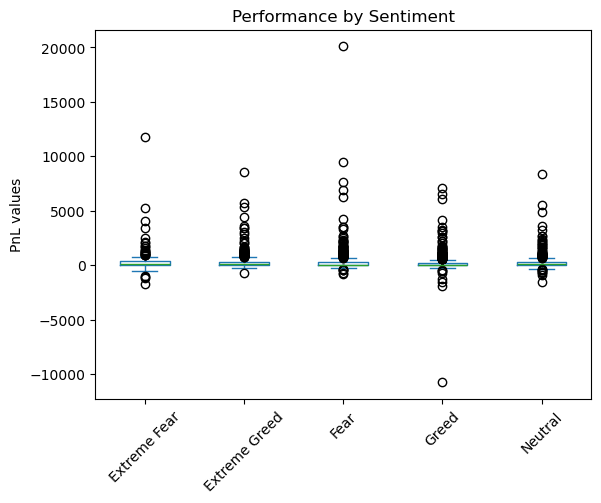

In [39]:
# Visualizing the result through boxplot 
master.plot(
    kind ='box',
    column='PnL',
    by='classification',
    rot=45
)

plt.title("Performance by Sentiment")
plt.ylabel("PnL values")
plt.savefig("EDA_Images/Performance_by_Sentiment.png") #saving image
plt.show()

#### Insights
* Market Sentiment does impact trader's performance
* When the market is greed, PnL is low, suggesting that trader might get too `aggressive` or `overconfident`.
* However, when it is fear, PnL is high, suggesting cautious behaviour of the trader.


### 2. Do traders change behavior according to sentiment?

In [40]:
# grouping the trade_size, leverage, long_short_ratio with sentiment will give the trader behaviour.
trader_behaviour = (
                master
                .groupby('classification')[['num_trades', 'avg_trade_size', 'avg_leverage', 'long_short_ratio']]
                .mean()
                .reset_index()
)

trader_behaviour

,classification,num_trades,avg_trade_size,avg_leverage,long_short_ratio
0,Extreme Fear,2106.8500,1570.9707,109.2253,1.1423
1,Extreme Greed,744.5171,1392.9844,253.6019,1.2941
2,Fear,1318.1302,1642.6023,184.8727,1.8302
3,Greed,809.3179,1653.3685,343.0736,2.0063
4,Neutral,1235.8670,1541.6793,271.9568,1.4868


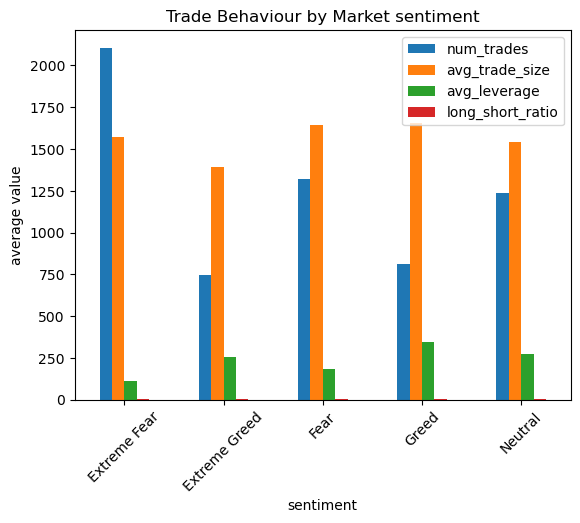

In [41]:
# visulizing the result
trader_behaviour.set_index('classification').plot(kind='bar')
plt.title('Trade Behaviour by Market sentiment')
plt.xticks(rotation=45)
plt.xlabel('sentiment')
plt.ylabel('average value')
plt.savefig("EDA_Images/Trade_Behaviour_by_Sentiment.png") #saving image
plt.show()

#### Insights
* Yes, trader behaviour `changes` significantly with sentiment.
* Trader trade `much` more during fear and `less` in greed days.
* Traders use `much higher leverage` when the market is greed, which explains why the `PnL` is low in greed.
* In Greed markets, traders are `long biased`, while in Fear markets they are more balanced. 

### 3. Segments

#### High vs Low leverage traders

In [42]:
# calculating avg_laverage of each trader
trader_leverage = (
    trades
    .groupby('Account')['leverage_proxy']
    .mean()
    .reset_index(name='mean_leverage')
)

In [43]:
trader_leverage.describe()

,mean_leverage
count,32.0000
mean,184.4459
std,277.6562
min,1.8320
25%,33.9123
50%,99.2389
75%,188.3659
max,1403.3524


In [44]:
# setting threshold
threshold = trader_leverage['mean_leverage'].median()

# segmenting traders on leverage
trader_leverage['leverage_segment'] = np.where(
        trader_leverage['mean_leverage'] > threshold, 
        'High leverage',
        'Low leverage'
)

In [45]:
# check counts
trader_leverage['leverage_segment'].value_counts()

leverage_segment
Low leverage     16
High leverage    16
Name: count, dtype: int64

In [46]:
# merging 'leverage_segment' into Master table
master = master.merge(
            trader_leverage[['Account','leverage_segment']],
            how='left',
            on='Account'
)

In [47]:
# analyze performance by segment + sentiment
leverage_sentiment = (
        master
        .groupby(['classification', 'leverage_segment'])['PnL']
        .mean()
        .reset_index()
)

# creating pivot table
leverage_sentiment_pivot = leverage_sentiment.pivot(
        index='classification',
        columns='leverage_segment',
        values='PnL'
)

leverage_sentiment_pivot

leverage_segment,High leverage,Low leverage
classification,,
Extreme Fear,217.5349,555.6353
Extreme Greed,280.0955,333.6219
Fear,215.4781,472.7637
Greed,166.1973,334.8870
Neutral,268.8714,297.9277


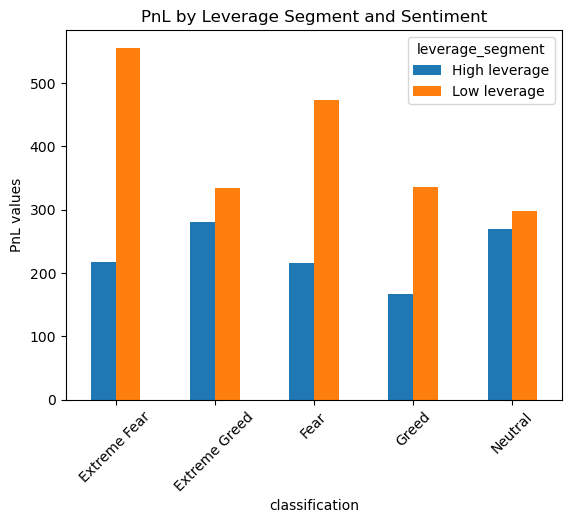

In [48]:
leverage_sentiment_pivot.plot(kind='bar')
plt.title('PnL by Leverage Segment and Sentiment')
plt.xticks(rotation=45)
plt.ylabel('PnL values')
plt.savefig("EDA_Images/Leverage_and_Sentiment.png") #saving image
plt.show()

##### Insights
* Low-leverage traders consistently `outperform high-leverage` traders in almost every sentiment.
* High leverage is systematically bad for performance, especially in Fear markets.

#### Frequent vs Infrequent traders

In [49]:
# counting trader frequency
trade_counts = (
    trades
    .groupby('Account')['Trade ID']
    .count()
    .reset_index(name='total_trades')
)

# check result
trade_counts.head()

,Account,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [50]:
trade_counts.describe()

,total_trades
count,32.0000
mean,6600.7500
std,8250.3737
min,332.0000
25%,1381.7500
50%,3699.0000
75%,8862.5000
max,40184.0000


In [51]:
# Using quantile method to segment trader by frequency
q75 = trade_counts['total_trades'].quantile(0.75)
q25 = trade_counts['total_trades'].quantile(0.25)

trade_counts['frequency'] = np.where(
    trade_counts['total_trades'] >= q75,
    'Frequent Trader',
    np.where(
        trade_counts['total_trades'] <= q25,
        'Infrequent Trader',
        'Mid Frequency'
    )
)

# check freq_segment
trade_counts['frequency'].value_counts()

frequency
Mid Frequency        16
Frequent Trader       8
Infrequent Trader     8
Name: count, dtype: int64

In [52]:
# merge with master table
master = (
    master.
        merge(
            trade_counts[['Account', 'frequency']],
            how='left',
            on='Account'
        )
)

In [53]:
# grouping freq_segment with sentiment
frequent_sentiment = (
    master
        .groupby(['classification', 'frequency'])['PnL']
        .mean()
        .reset_index()
)

# filtering frequent_sentiment
freq_sentiment_filtered = frequent_sentiment[
    frequent_sentiment['frequency'].isin(['Frequent Trader','Infrequent Trader'])
]

# making pivot table
freq_sentiment_filtered_pivot = freq_sentiment_filtered.pivot(
                                index='classification',
                                columns='frequency',
                                values='PnL'
                            )

# check pivot 
freq_sentiment_filtered_pivot

frequency,Frequent Trader,Infrequent Trader
classification,,
Extreme Fear,647.9502,-7.9049
Extreme Greed,506.2854,133.1137
Fear,501.9987,50.9795
Greed,282.8532,198.8814
Neutral,442.3880,67.6198


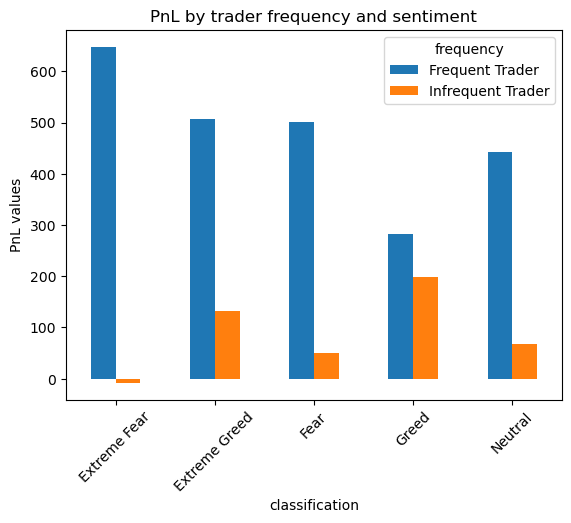

In [54]:
# visualizing result
freq_sentiment_filtered_pivot.plot(kind='bar')
plt.title('PnL by trader frequency and sentiment')
plt.xticks(rotation=45)
plt.ylabel('PnL values')
plt.savefig("EDA_Images/trader_frequency_and_Sentiment.png") #saving image
plt.show()

##### Insights
* Active traders perform `MUCH better` than Inactive traders in every market sentiments, possibly because they react faster to volatility.
* On average, Frequent Traders differ from Infrequent Traders by `~133%` across sentiment categories.

#### Consistent vs Inconsistent traders

In [55]:
# Calculating standard deviation per account
pnl_vol = (
    daily_PnL
        .groupby('Account')['PnL']
        .std()
        .reset_index(name='pnl_volatility')
)

pnl_vol[:5]

,Account,pnl_volatility
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1625.2578
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,551.5886
2,0x271b280974205ca63b716753467d5a371de622ab,1281.4859
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,269.9161
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,402.7080


In [56]:
# setting threshold
vol_threshold = pnl_vol['pnl_volatility'].median()

# categorize traders according to consistency
pnl_vol['consistency'] = np.where(
                            pnl_vol['pnl_volatility'] <= vol_threshold, 
                            'consistent trader', 
                            'inconsistent trader')

# Count consistency
pnl_vol['consistency'].value_counts()

consistency
inconsistent trader    16
consistent trader      16
Name: count, dtype: int64

In [57]:
# merge into master table
master = master.merge(pnl_vol[['Account', 'consistency']], how='left', on='Account')

In [58]:
# grouping sentiment with consistency to analyse consistent and inconsistent trader behaviour
consistency_sentiment = (
            master
                .groupby(['classification', 'consistency'])['PnL']
                .mean()
                .reset_index()
)

# making pivot table
consistency_sent_pivot = consistency_sentiment.pivot(
            index='classification',
            columns='consistency',
            values='PnL'
)

# check table 
consistency_sent_pivot

consistency,consistent trader,inconsistent trader
classification,,
Extreme Fear,94.1949,620.7105
Extreme Greed,174.2060,472.9148
Fear,103.8075,493.8055
Greed,114.1586,317.6630
Neutral,119.6050,418.8218


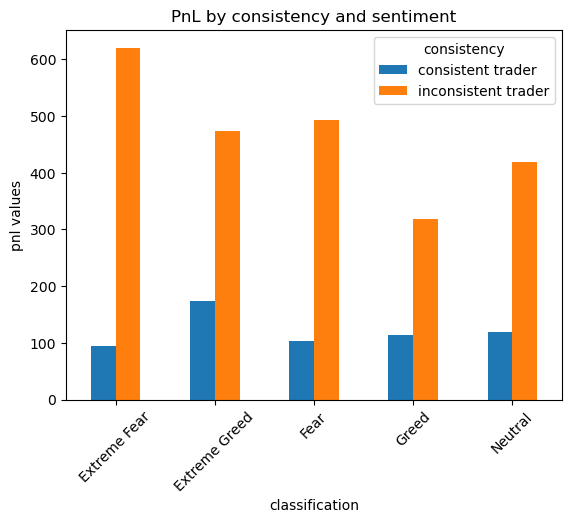

In [59]:
consistency_sent_pivot.plot(kind='bar')
plt.title('PnL by consistency and sentiment')
plt.xticks(rotation=45)
plt.ylabel('pnl values')
plt.savefig("EDA_Images/consistency_and_sentiment.png") #saving image
plt.show()

##### Insights
* Very Intrestingly, `Inconsistent trader` outperforms `Consistent trader`.
* Possible reasons could be that consistent trader maybe `risk-averse` while inconsistent trader take bigger bets which sometimes pays off.